In [2]:
from keras.datasets import fashion_mnist

In [12]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
import numpy as np

In [15]:
model.fit(train_x.astype(np.float32),train_y.astype(np.float32),epochs=5,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 38us/step - loss: 3.4310 - accuracy: 0.6904 - val_loss: 0.7290 - val_accuracy: 0.7479
Epoch 2/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.6499 - accuracy: 0.7680 - val_loss: 0.5794 - val_accuracy: 0.7998
Epoch 3/5
48000/48000 [==============================] - 2s 39us/step - loss: 0.5605 - accuracy: 0.7957 - val_loss: 0.5575 - val_accuracy: 0.8101
Epoch 4/5
48000/48000 [==============================] - 2s 34us/step - loss: 0.5229 - accuracy: 0.8153 - val_loss: 0.4978 - val_accuracy: 0.8247
Epoch 5/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.5000 - accuracy: 0.8271 - val_loss: 0.5028 - val_accuracy: 0.8304


In [17]:
loss,acc = model.evaluate(test_x,test_y)
print(loss)
print(acc)

10000/10000 [==============================] - 0s 13us/step
0.5224660501956939
0.8216000199317932


In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# To know the labels list
def check_label(id_,labels):
    label = train_y[id_]
    if label not in labels:
        plt.imshow(train_x[id_])
        print(label)
        plt.show()
    return label

9


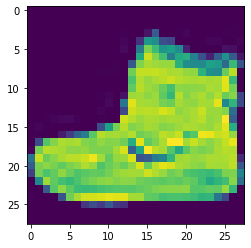

0


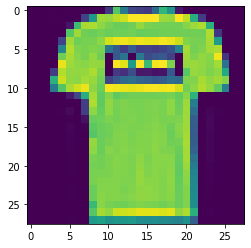

3


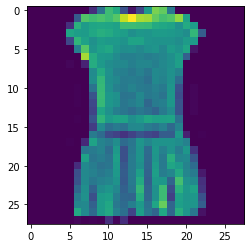

2


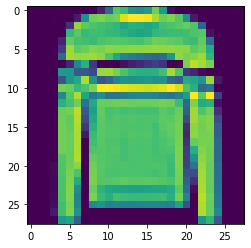

7


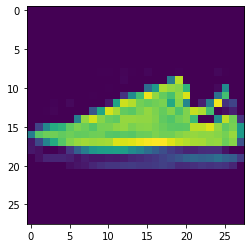

5


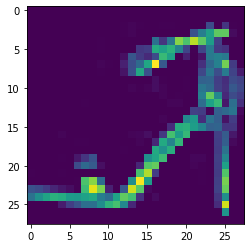

1


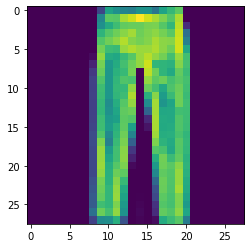

6


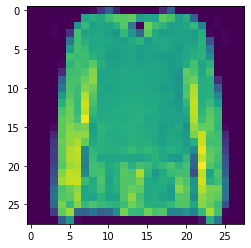

4


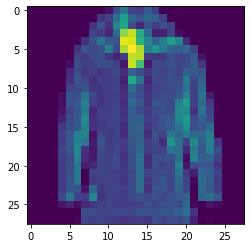

8


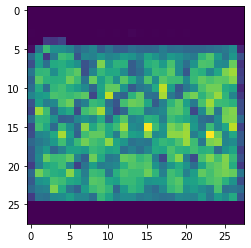

In [105]:
#To know unqiue Labels 
labels=[]
i=0;
while len(labels)<10:
    label = check_label(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1

In [62]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(test_x[id_:id_+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(test_x[id_])
    plt.show()

trouser


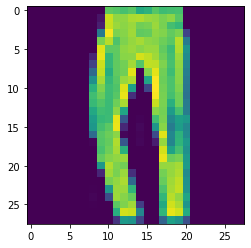

In [107]:
predict(5)

coat


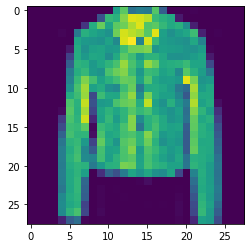

sandal


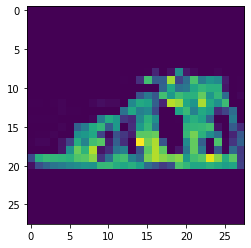

sandal


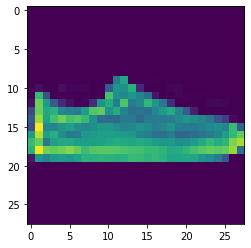

dress


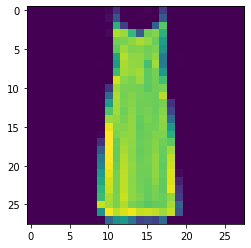

coat


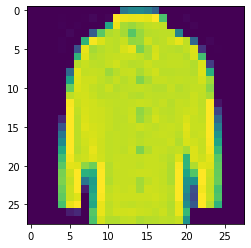

trouser


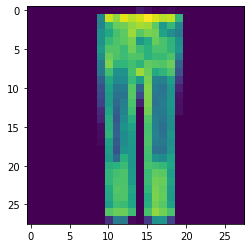

pullover


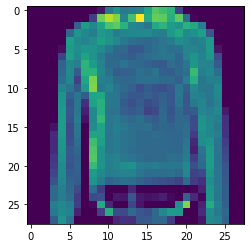

shirt


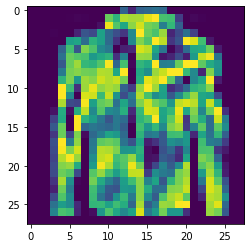

bag


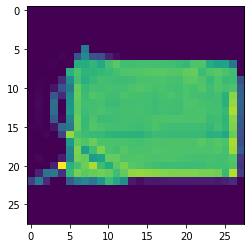

t_shirt


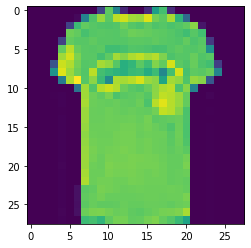

In [106]:
for i in range(10,20):
    predict(i)